In [1]:
from snp_query_box.dsnp_transform import memberJourney as mj
import pandas as pd

In [2]:
storage_file_path = r"Z:\Projects\COE\DSNP\dsnp_data_storage\monthly_flat_files\2025-01-31"
condensed_dsnp_mbr = pd.read_parquet(f'{storage_file_path}/condensed_dsnp_mbr.parquet')
pull_call_log_all_dsnp = pd.read_parquet(f'{storage_file_path}/pull_call_log_all_dsnp.parquet')
mbr_hra_df = pd.read_parquet(f'{storage_file_path}/mbr_hra_2025_with_broker_without_iha.parquet')

In [3]:
call_with_member_info = mj.mj_prepare_pull_call(pull_call_log_all_dsnp, condensed_dsnp_mbr)
hra_select_df = mj.mj_prepare_hra_data(mbr_hra_df)

c:\Program Files\Python\310\lib\site-packages\snp_query_box\dsnp_transform\memberJourney.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hra_select_df.loc[:, 'anchor_date'] = pd.to_datetime(hra_select_df['Anchor_date'])
c:\Program Files\Python\310\lib\site-packages\snp_query_box\dsnp_transform\memberJourney.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hra_select_df.loc[:, "most_recent_hra_date"] = hra_select_df[["most_recent_hra_completion_prior_to_reporting_year", "most_recent_hra_completion_d

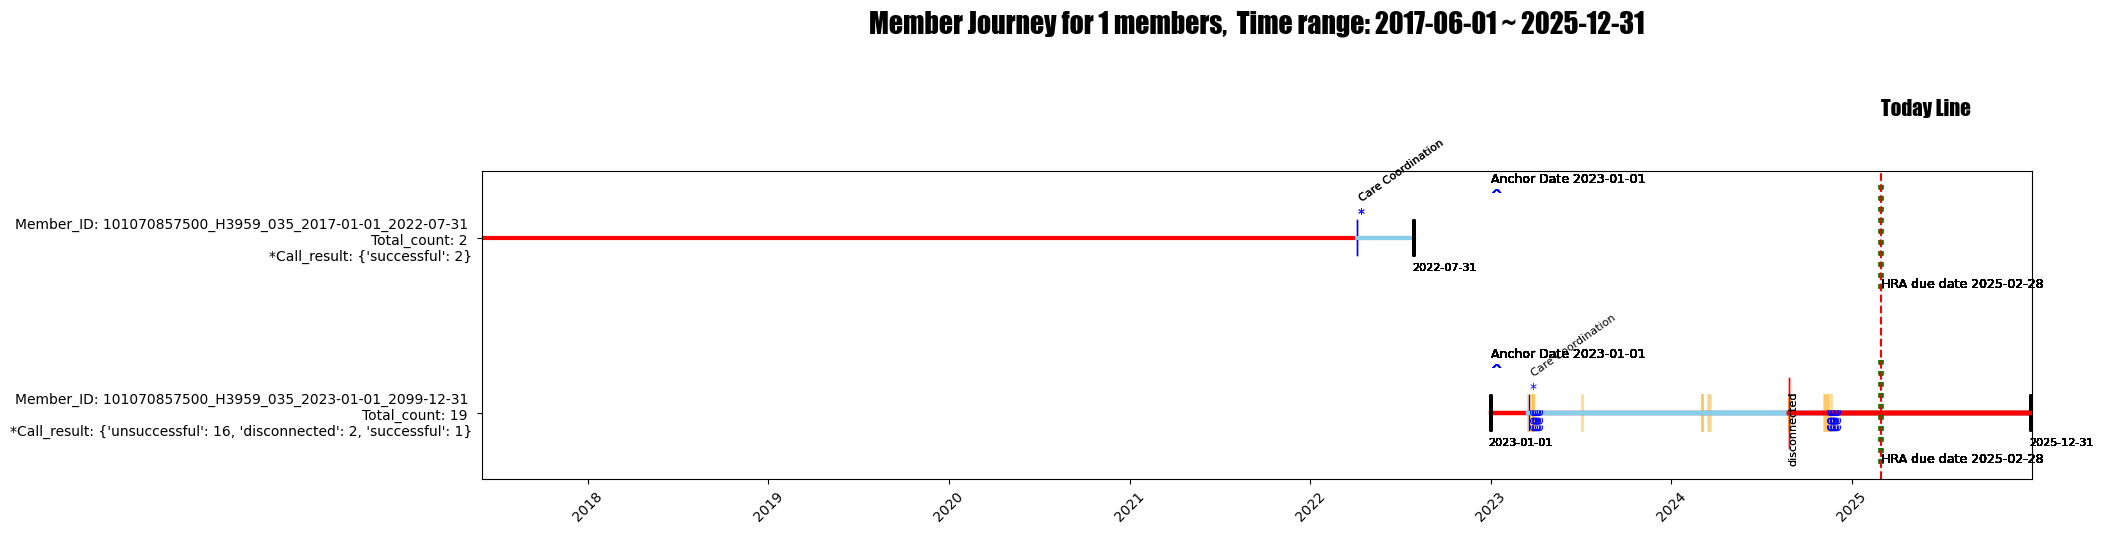

In [4]:

mj_input_df = mj.mj_prepare_input(call_with_member_info, hra_select_df, member_id_list=['101070857500'])
mj.member_call_journey(mj_input_df, limit_left = "2017-06-01", limit_right='2025-12-31')

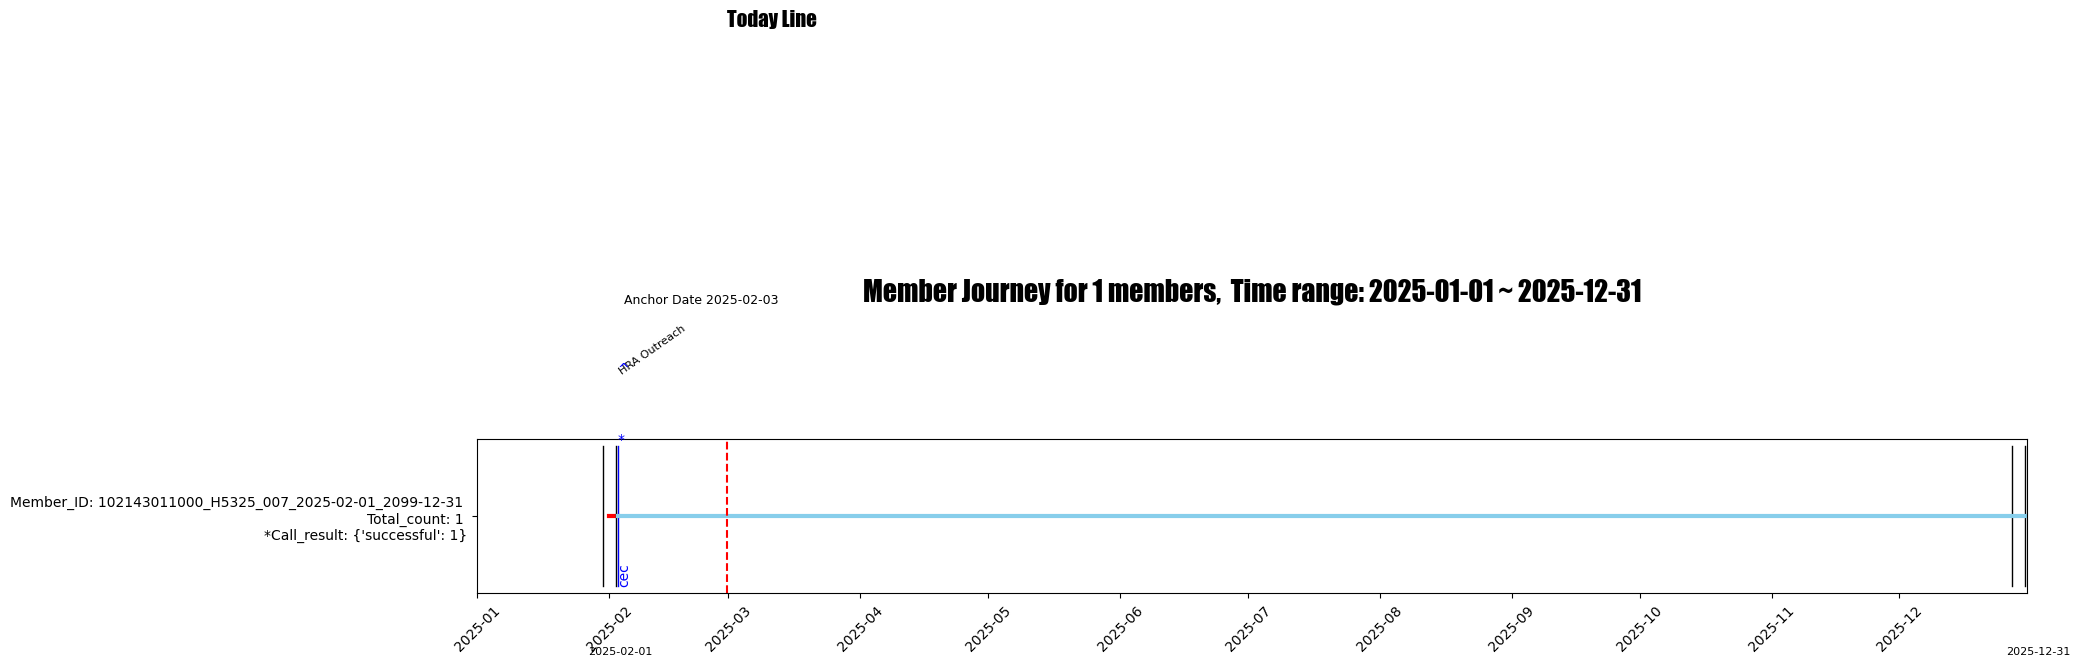

In [5]:

mj_input_df = mj.mj_prepare_input(call_with_member_info, hra_select_df, member_id_list=['102143011000'])
mj.member_call_journey(mj_input_df, limit_left = "2025-01-01", limit_right='2025-12-31')

In [6]:
call_with_member_info[call_with_member_info["Member_ID"]=="102143011000"]

,Member_ID,EFF_Date,Term_Date,Contract_Number,PBP,SNP,Plan_Type,MA_Market_PDP_Product,cl_call_log_id,mcl_identifier_value_id,...,cl_call_log_rel_type_desc,cl_call_log_type_desc,cl_program_type_desc,cl_contact_dts,cl_effective_dts,cl_attempts_typ_key_desc,cl_attempt_status_key_desc,cl_comments_txt,su_user_nm,contact_date
11573302,102143011000,2025-02-01,2099-12-31,H5325,007,D,DSNP,GEORGIAGULFSTATES,{F06AD73E-3265-44EA-8CB1-35A00DBFD4A7},102143011000,...,Member/Self,HRA Outreach,DSNP,2025-02-03 14:23:44,2025-02-03 00:00:00+00:00,Attempt 1,Successful,Christina Bowman,CECUser,2025-02-03


In [7]:
pull_call_log_all_dsnp[pull_call_log_all_dsnp["mcl_identifier_value_id"]=="102143011000"]

,src_sys_nm,src_file_nm,cl_call_log_id,mcl_member_id,mcl_identifier_value_id,cl_call_log_drctn_type_desc,cl_call_log_drctn_type_key_cd,cl_call_log_method_type_desc,cl_call_log_method_type_key_cd,cl_call_log_rel_type_desc,...,cl_attempt_status_key_desc,cl_attempt_status_typ_key_cd,cl_category_typ_desc,cl_category_typ_key_cd,cl_comments_txt,cl_contact_phone_number_2_nbr,cl_contact_phone_number_1_nbr,cl_contact_email_txt,cl_attempts_typ_key_desc,su_user_nm
7163213,MedCompass,snapshot_calllog_mcclnrprt_20250203160107183.dat,{F06AD73E-3265-44EA-8CB1-35A00DBFD4A7},{7AED0AC1-3910-4AF4-99AB-44BA6AAA9957},102143011000,,,Phone - Outbound,PO,Member/Self,...,Successful,S,,,Christina Bowman,,Gi((u,,Attempt 1,CECUser


In [8]:
call_with_member_info[call_with_member_info['su_user_nm']=='CECUser'][["Member_ID", "su_user_nm","contact_date"]]

,Member_ID,su_user_nm,contact_date
12070292,101039941100,CECUser,2022-10-04
12070283,101039941100,CECUser,2023-04-12
12070275,101039941100,CECUser,2023-04-14
12070284,101039941100,CECUser,2023-04-14
12070291,101039941100,CECUser,2023-04-17
...,...,...,...
11573302,102143011000,CECUser,2025-02-03
15206241,102143681100,CECUser,2025-02-05
10312693,102144272800,CECUser,2025-02-04
1096752,102144274500,CECUser,2025-02-03


In [9]:
call_with_member_info[(call_with_member_info["cl_call_log_id"].isnull()) & ((call_with_member_info["EFF_Date"] - call_with_member_info["Term_Date"]).dt.days > 31)
                      & (call_with_member_info["EFF_Date"]<=pd.to_datetime("2024-12-31"))
                    #& (call_with_member_info["Contract_Number"] == "H3312")
                    ].head(20)

,Member_ID,EFF_Date,Term_Date,Contract_Number,PBP,SNP,Plan_Type,MA_Market_PDP_Product,cl_call_log_id,mcl_identifier_value_id,...,cl_call_log_rel_type_desc,cl_call_log_type_desc,cl_program_type_desc,cl_contact_dts,cl_effective_dts,cl_attempts_typ_key_desc,cl_attempt_status_key_desc,cl_comments_txt,su_user_nm,contact_date


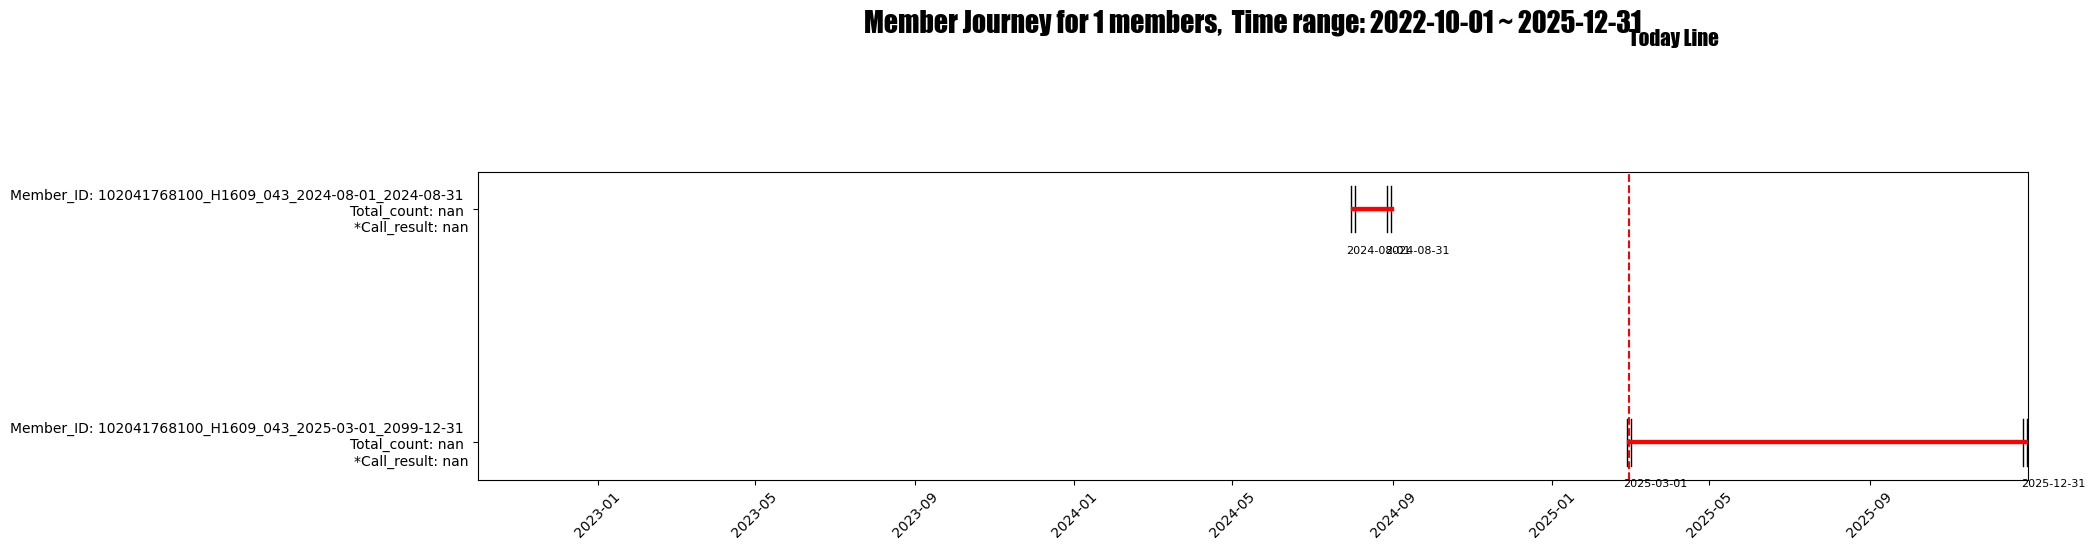

In [10]:
mj_input_df = mj.mj_prepare_input(call_with_member_info, hra_select_df, member_id_list=['102041768100'])
mj.member_call_journey(mj_input_df, limit_left = "2022-10-01", limit_right='2025-12-31')

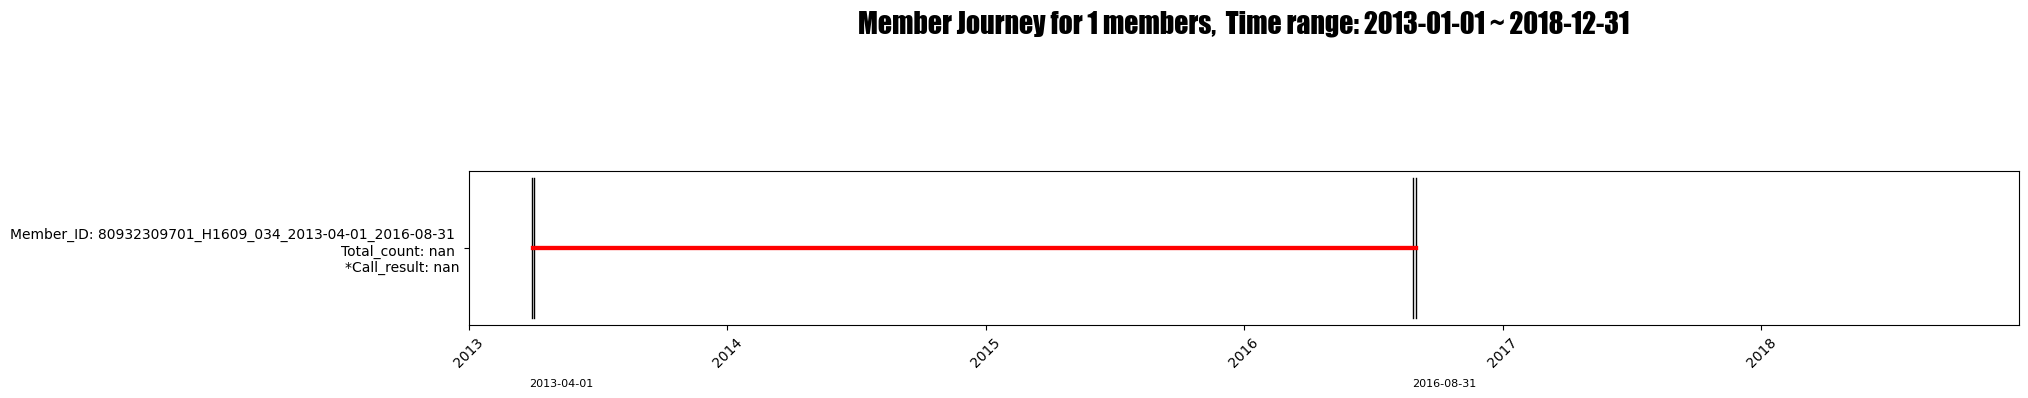

In [11]:
mj_input_df = mj.mj_prepare_input(call_with_member_info, hra_select_df, member_id_list=['80932309701'])
mj.member_call_journey(mj_input_df, limit_left = "2013-01-01", limit_right='2018-12-31')

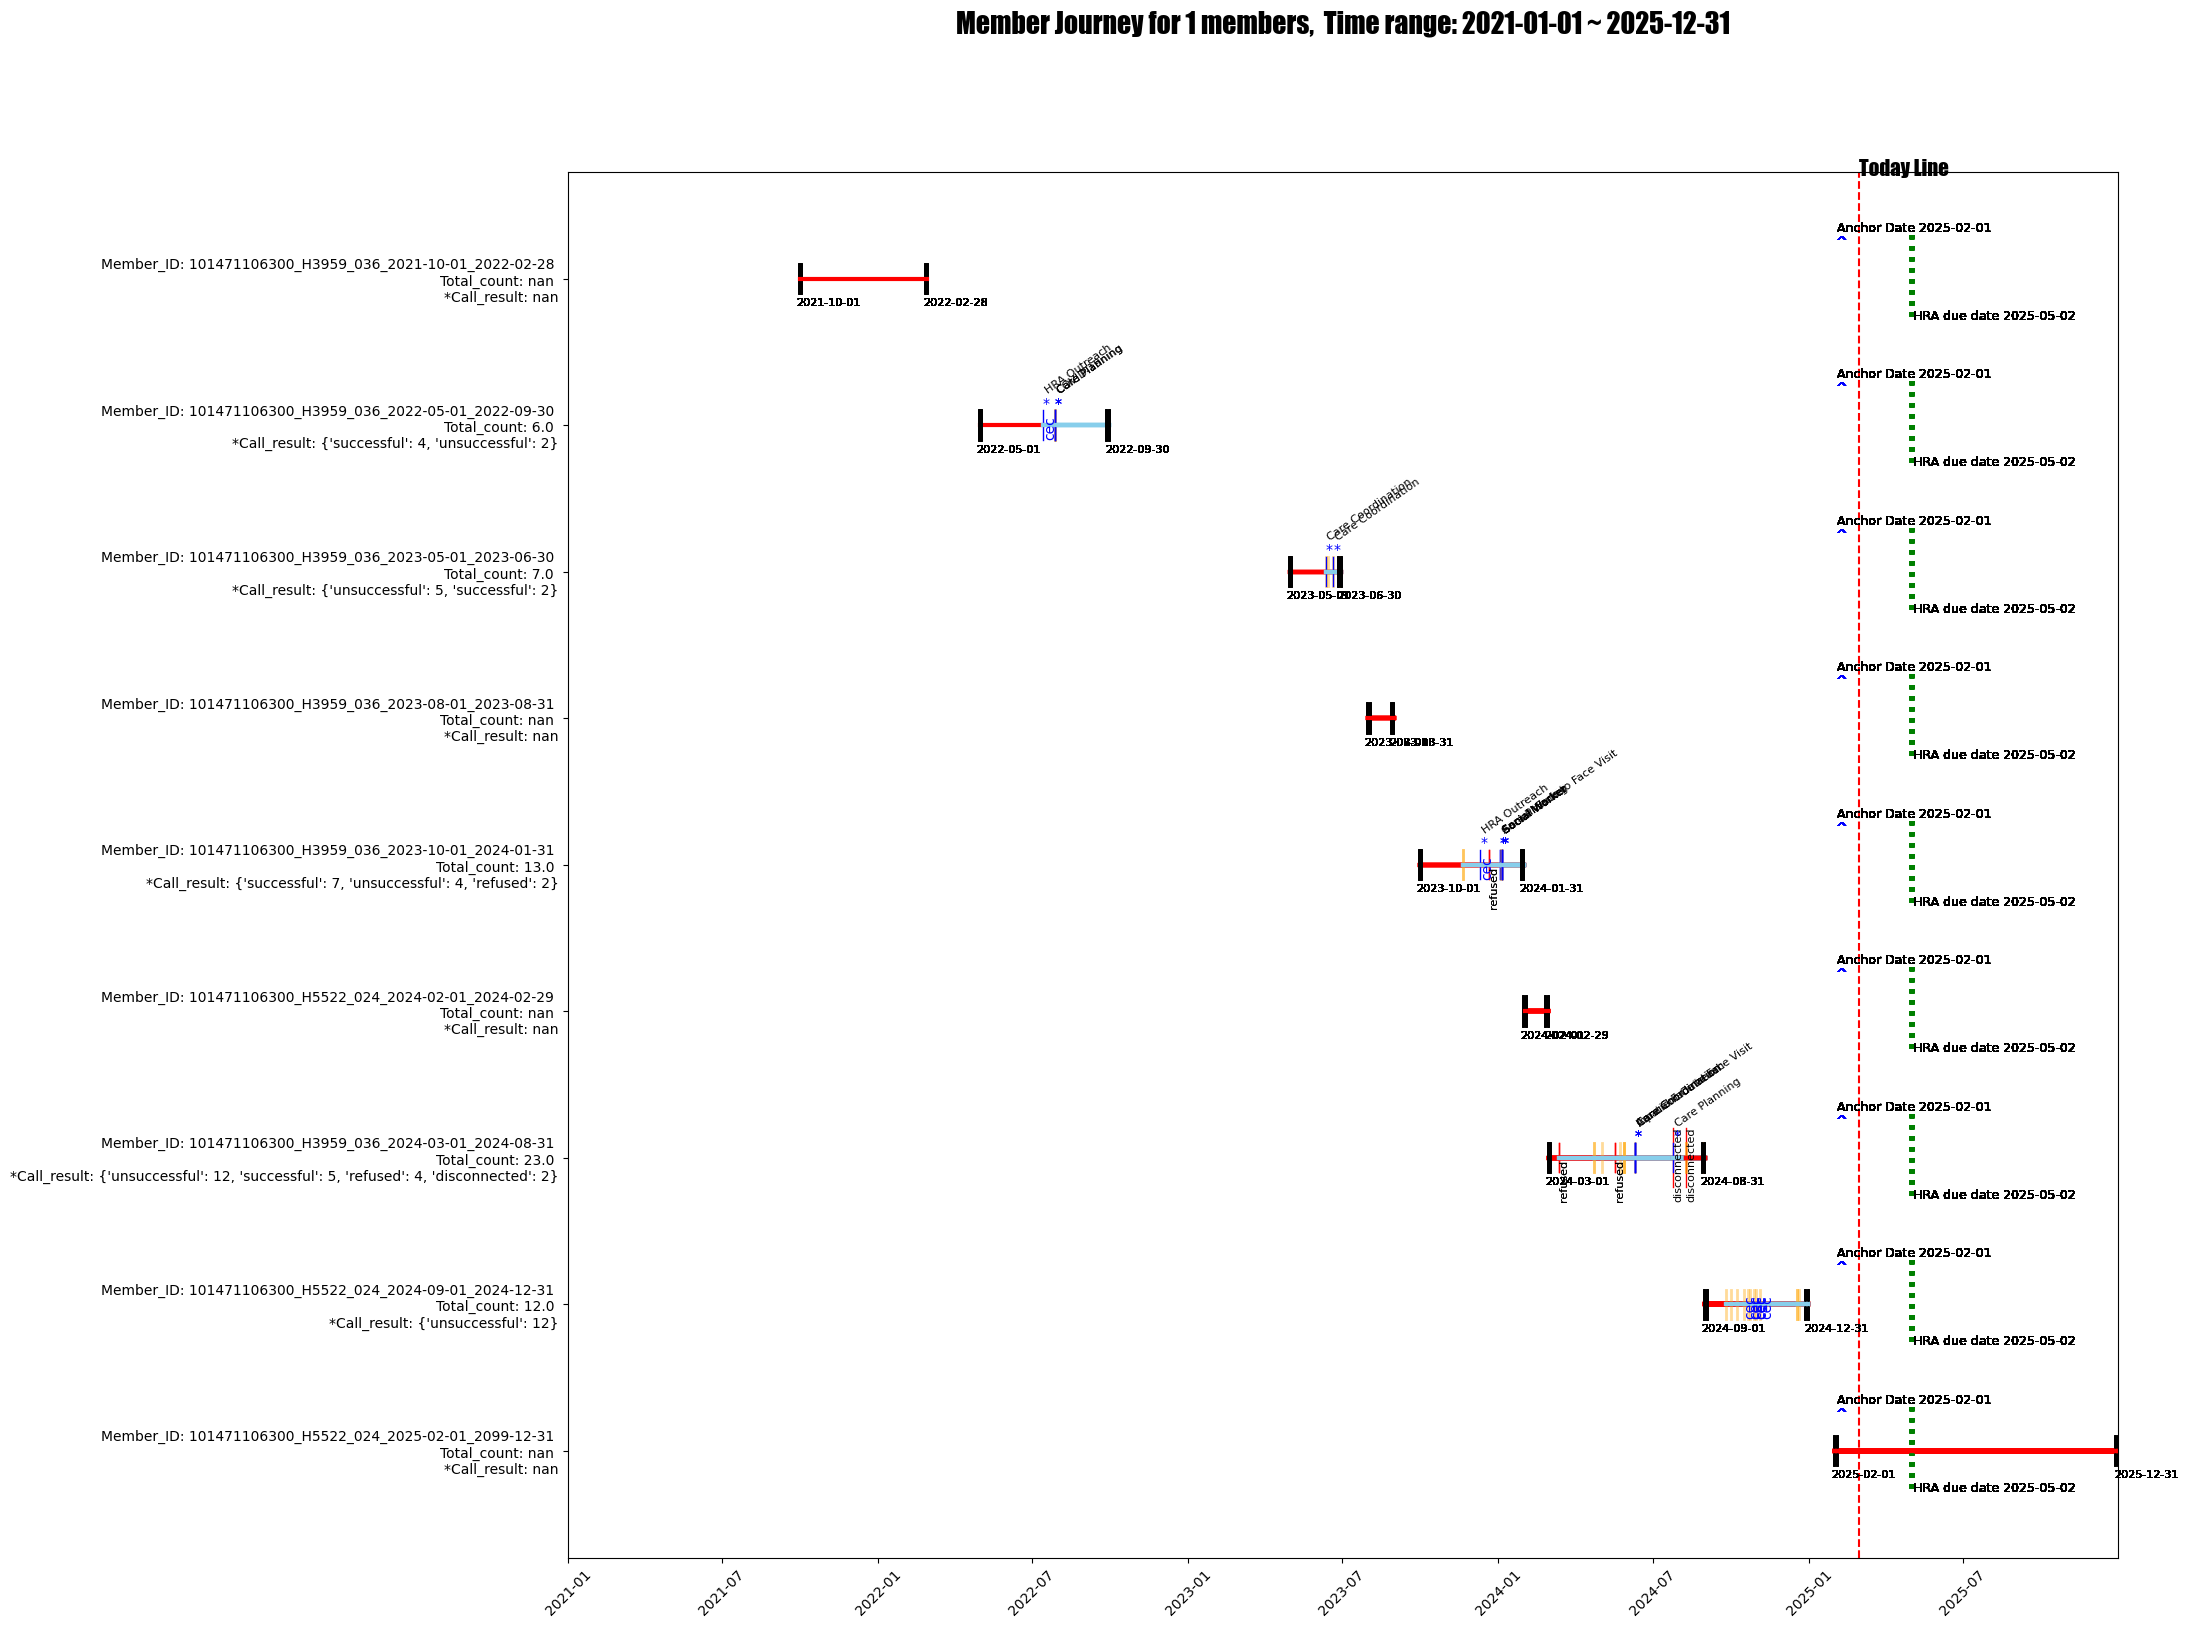

In [12]:
mj_input_df = mj.mj_prepare_input(call_with_member_info, hra_select_df, member_id_list=['101471106300'])
mj.member_call_journey(mj_input_df, limit_left = "2021-01-01", limit_right='2025-12-31')

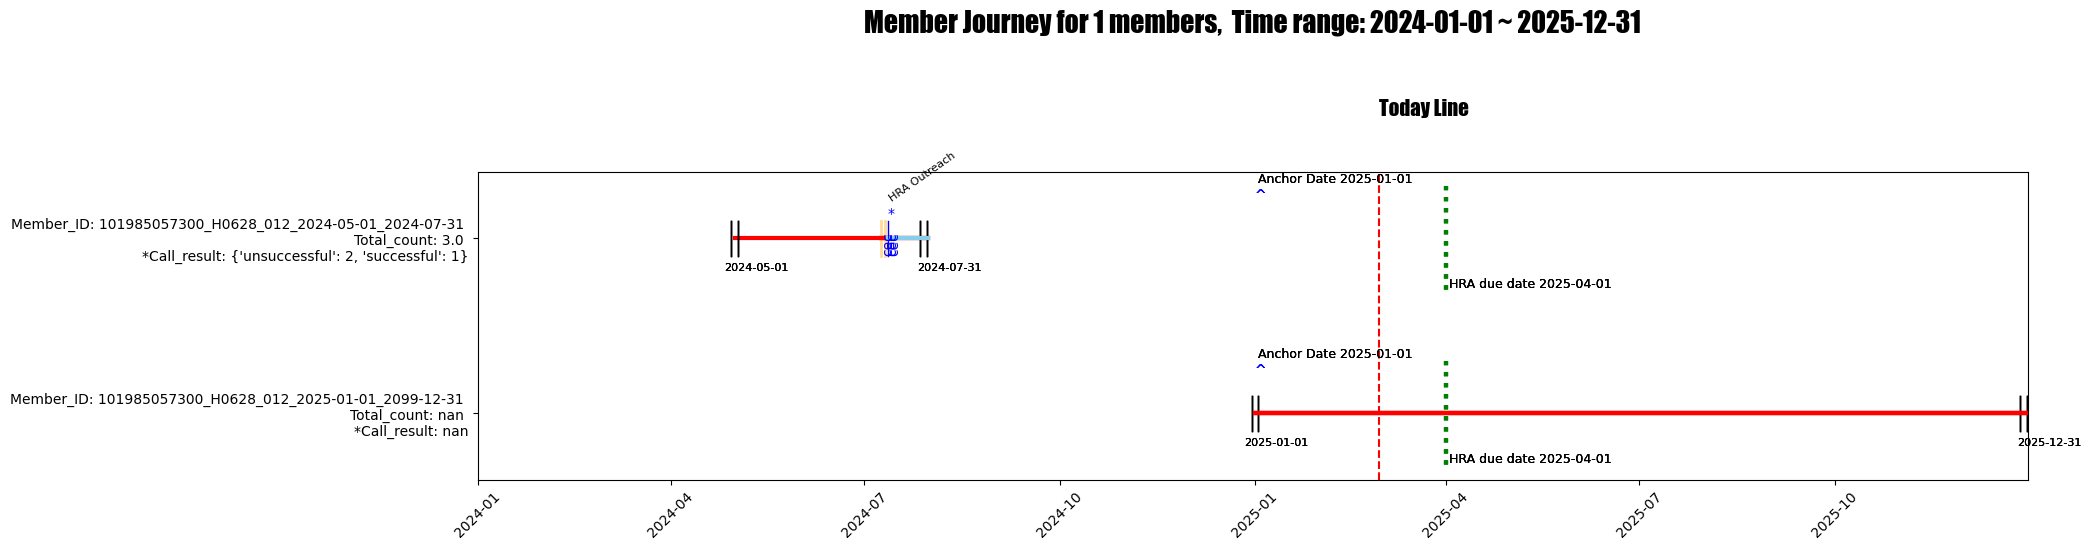

In [13]:
mj_input_df = mj.mj_prepare_input(call_with_member_info, hra_select_df, member_id_list=['101985057300'])
mj.member_call_journey(mj_input_df, limit_left = "2024-01-01", limit_right='2025-12-31')

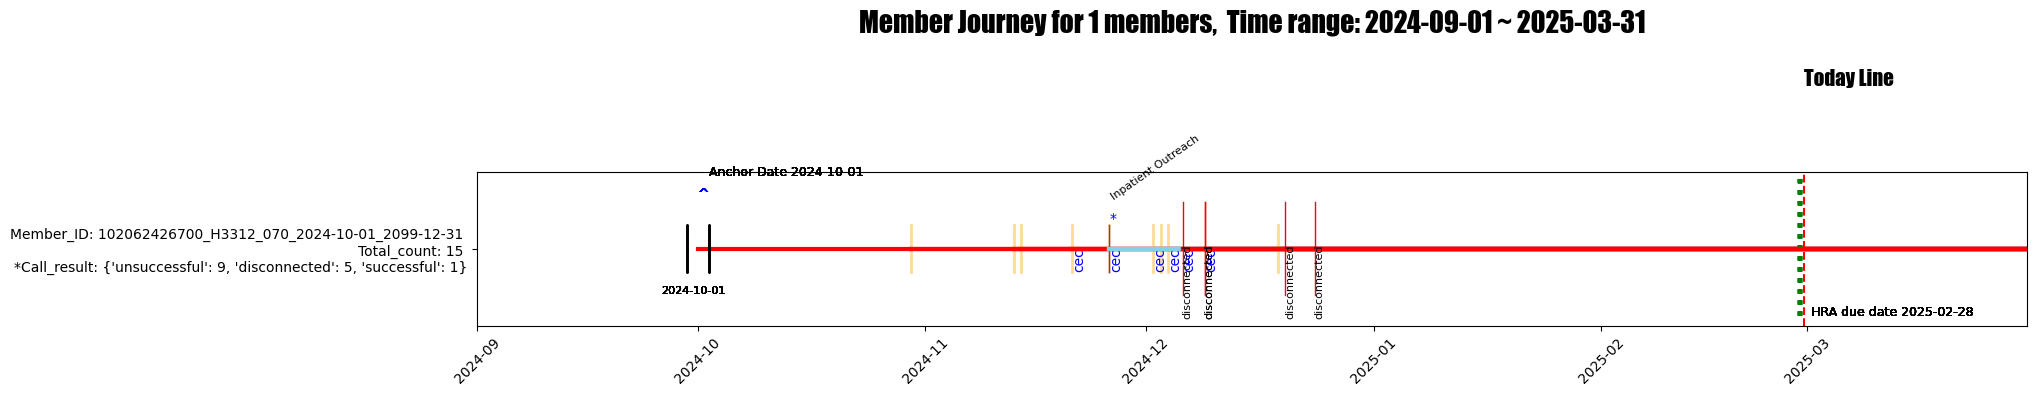

In [14]:

mj_input_df = mj.mj_prepare_input(call_with_member_info, hra_select_df, member_id_list=['102062426700'])
mj.member_call_journey(mj_input_df, limit_left = "2024-09-01", limit_right='2025-03-31')

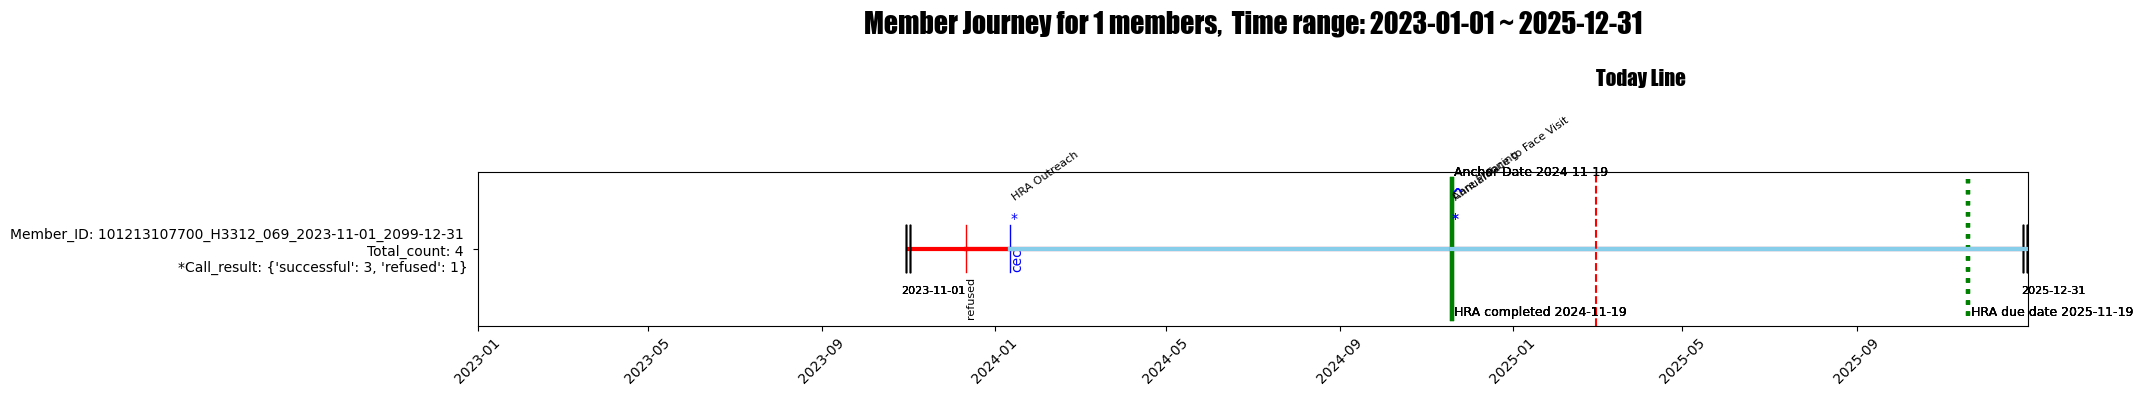

In [15]:
mj_input_df = mj.mj_prepare_input(call_with_member_info, hra_select_df, member_id_list=['101213107700'])
mj.member_call_journey(mj_input_df, limit_left ="2023-01-01", limit_right='2025-12-31')

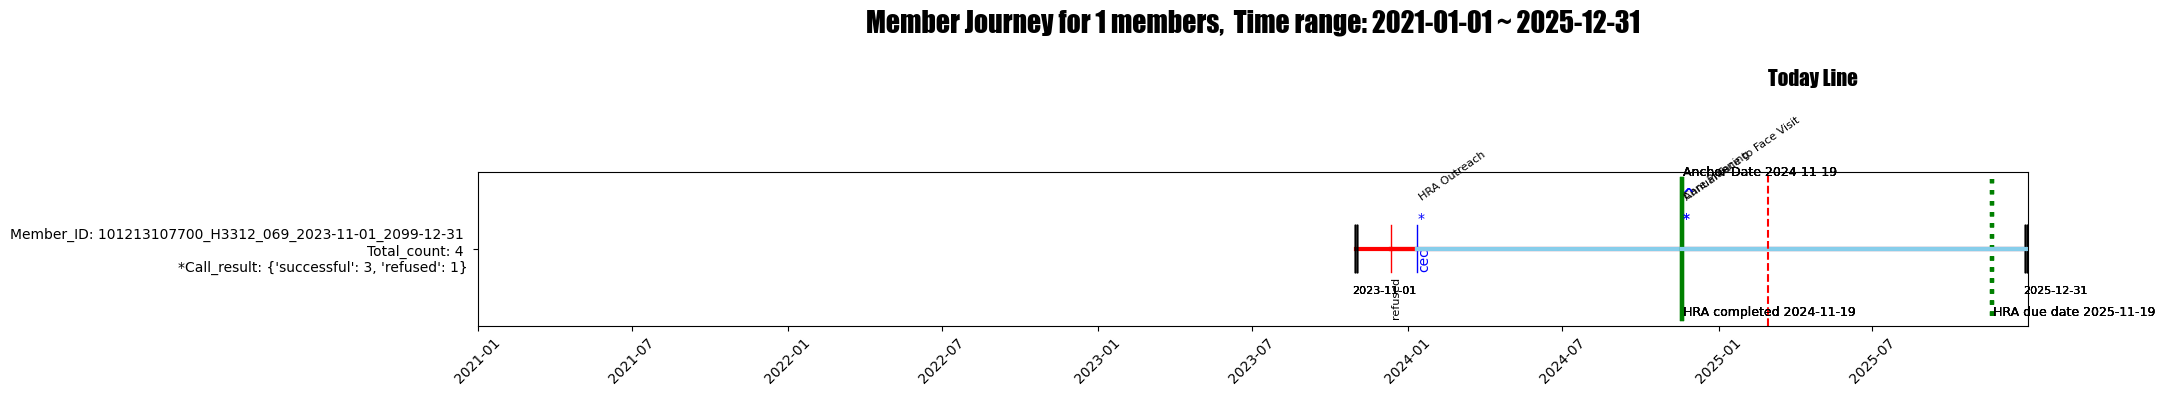

In [16]:
mj_input_df = mj.mj_prepare_input(call_with_member_info, hra_select_df, member_id_list=['101213107700'])
mj.member_call_journey(mj_input_df, limit_left ="2021-01-01", limit_right='2025-12-31')

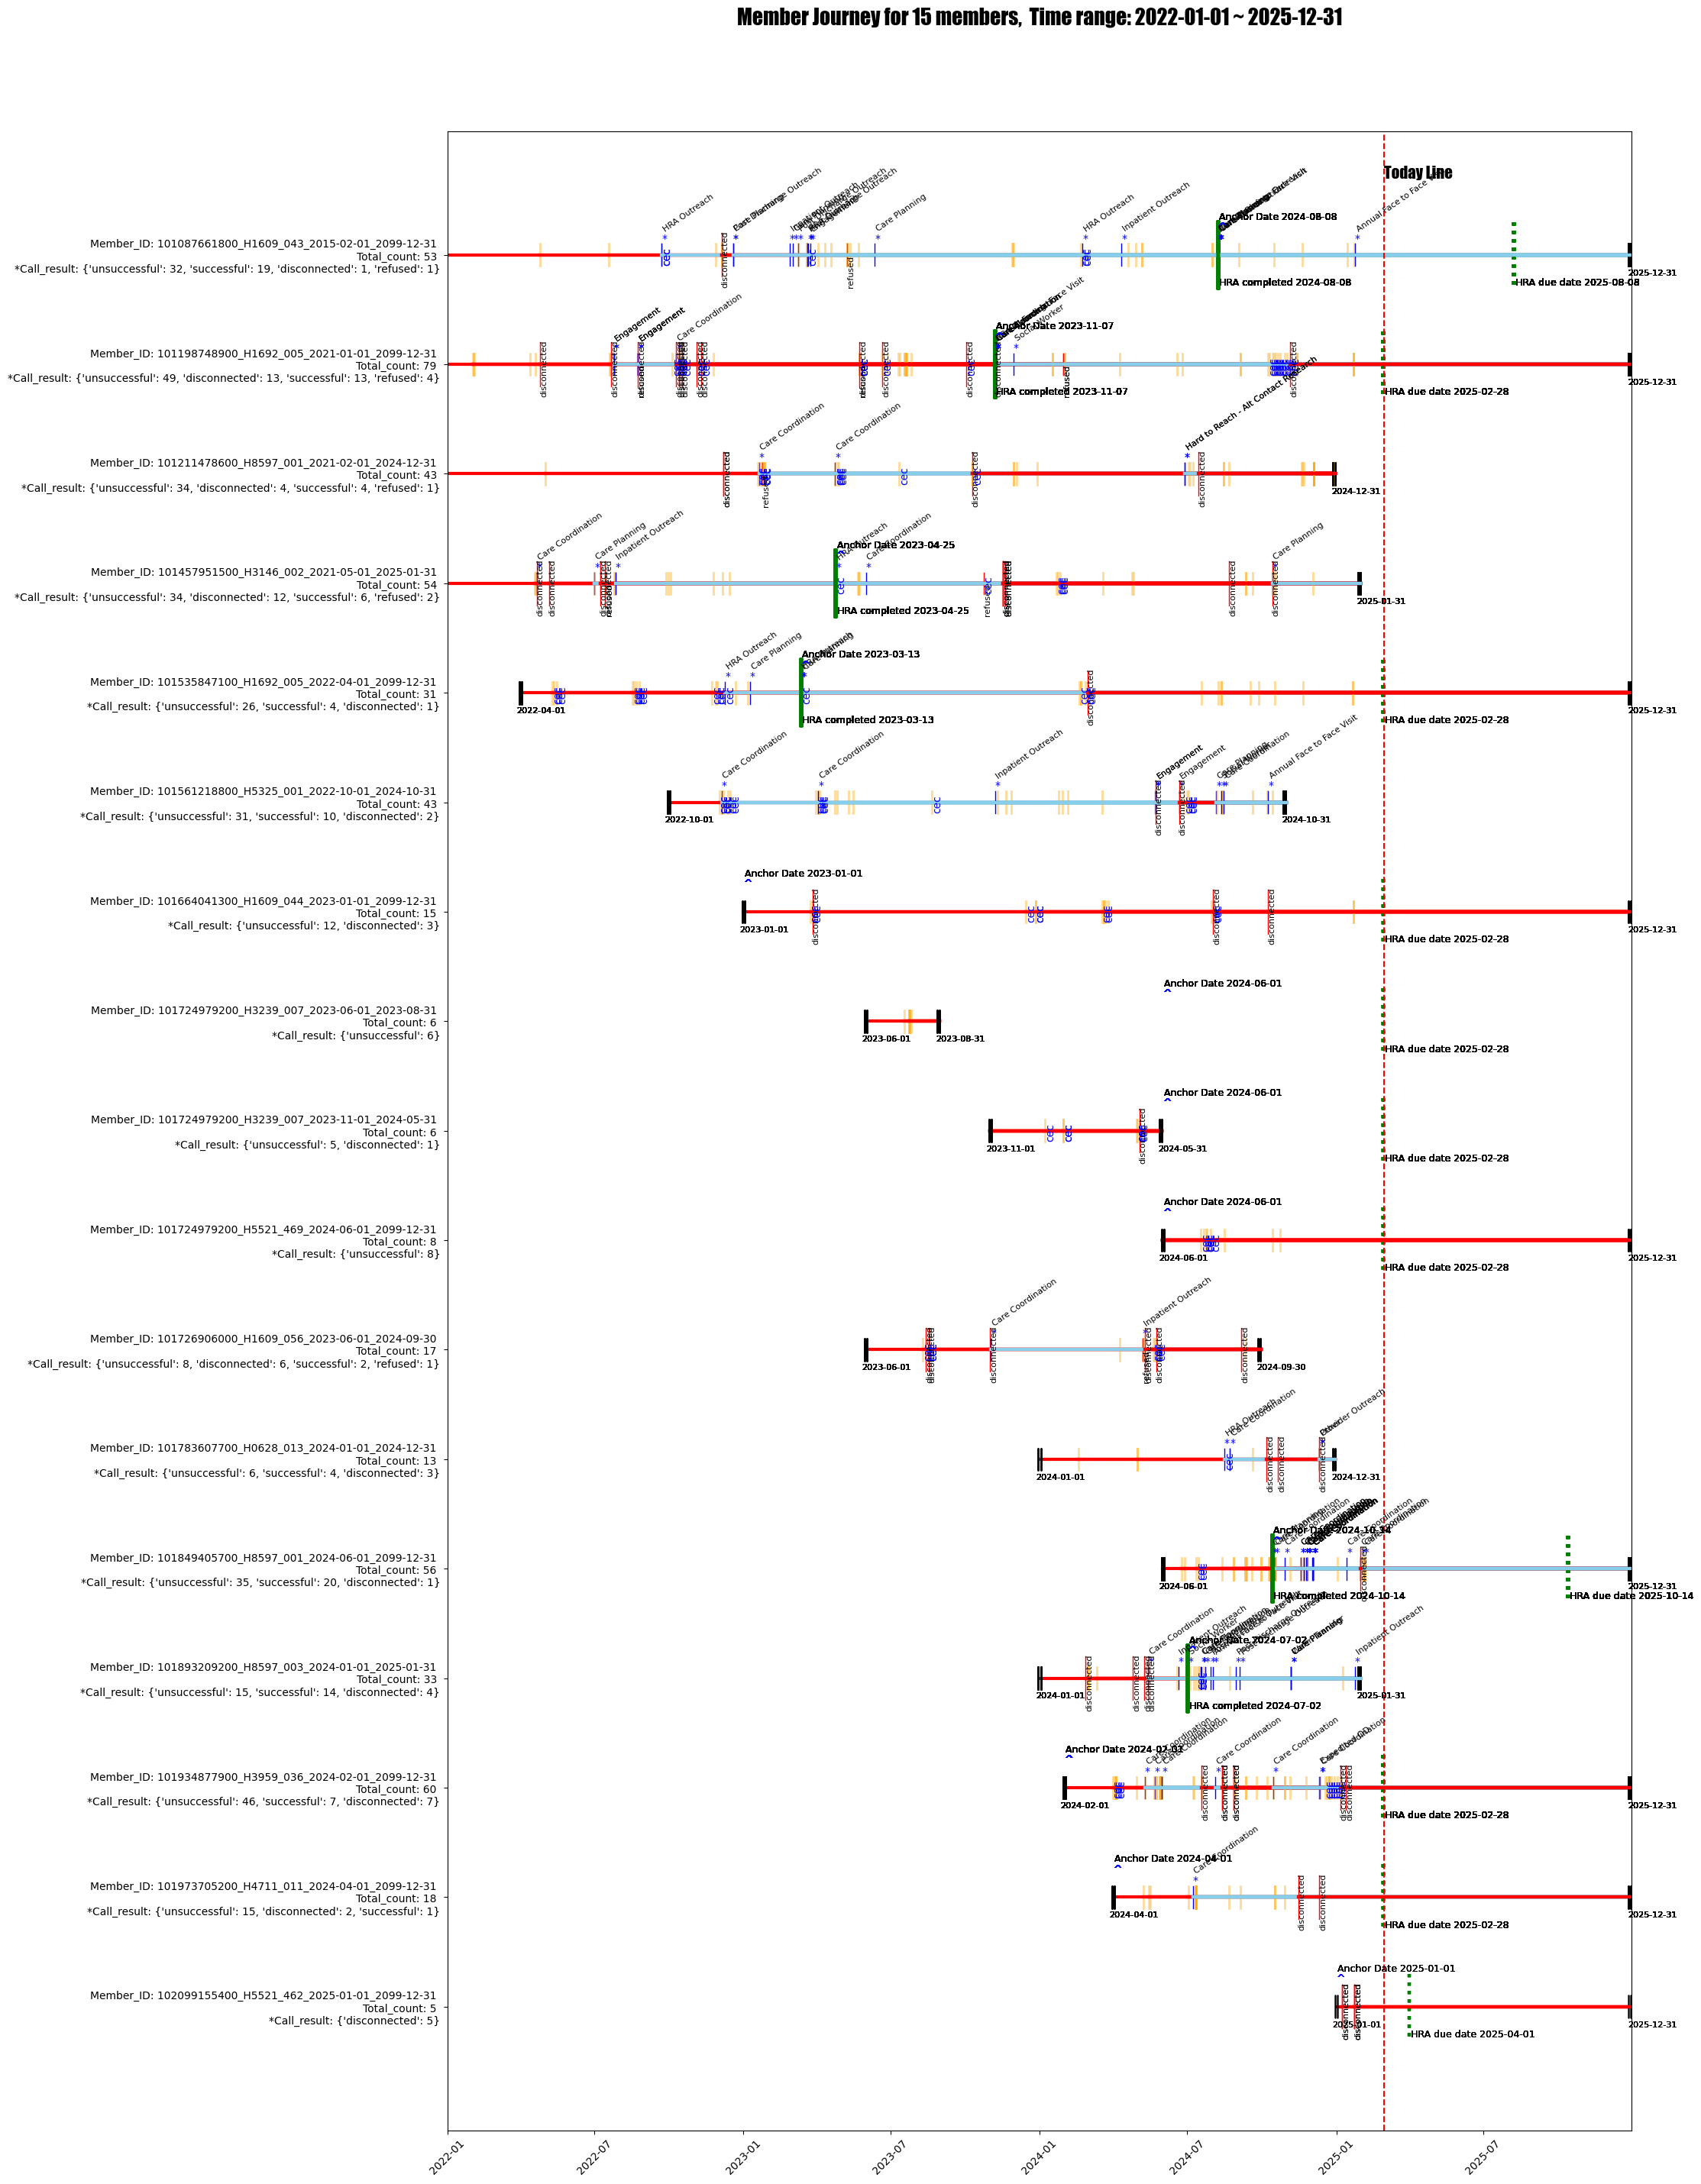

In [17]:
disconnected_member_list = list(set(call_with_member_info[call_with_member_info['cl_attempt_status_key_desc']=="Unsuccessful Invalid Phone Number"]
                                    ["Member_ID"].to_list()))[:15]
mj_input_df = mj.mj_prepare_input(call_with_member_info, hra_select_df, member_id_list=disconnected_member_list)

mj.member_call_journey(mj_input_df, limit_left = "2022-01-01", limit_right='2025-12-31')

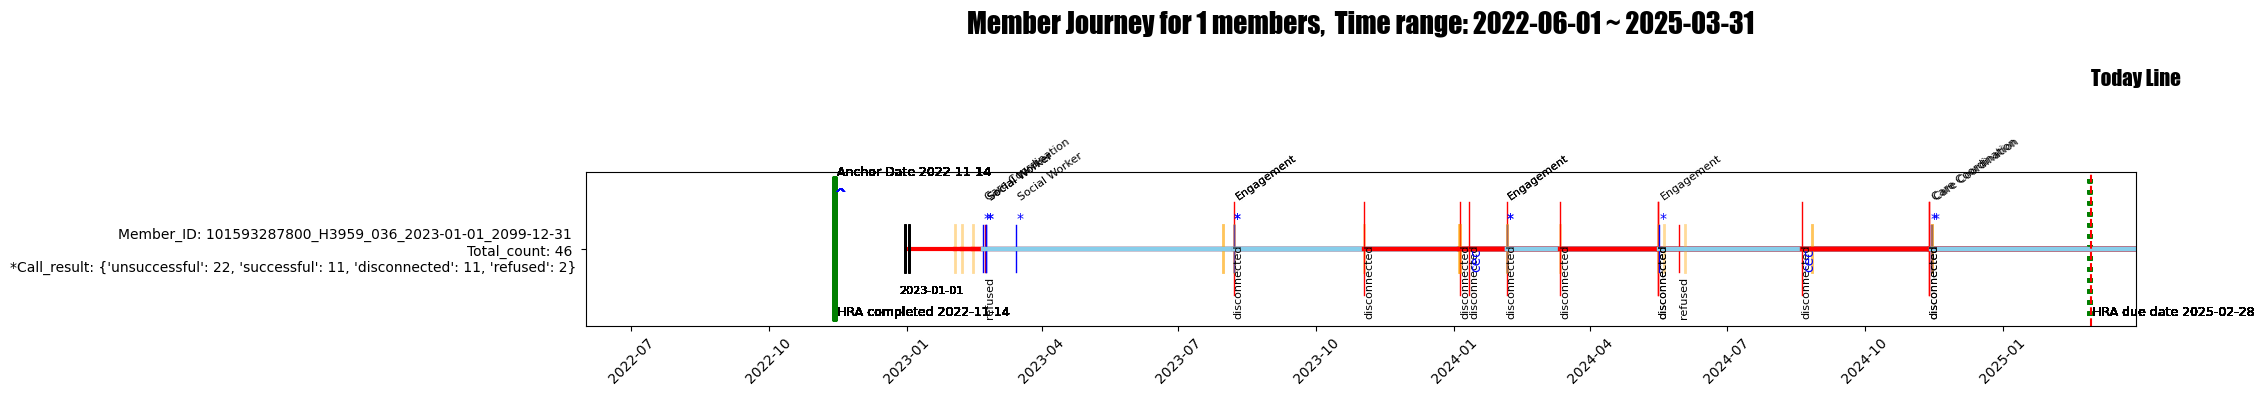

In [18]:
mj_input_df = mj.mj_prepare_input(call_with_member_info, hra_select_df, member_id_list=['101593287800'])
mj.member_call_journey(mj_input_df, limit_left ="2022-06-01", limit_right='2025-03-31')

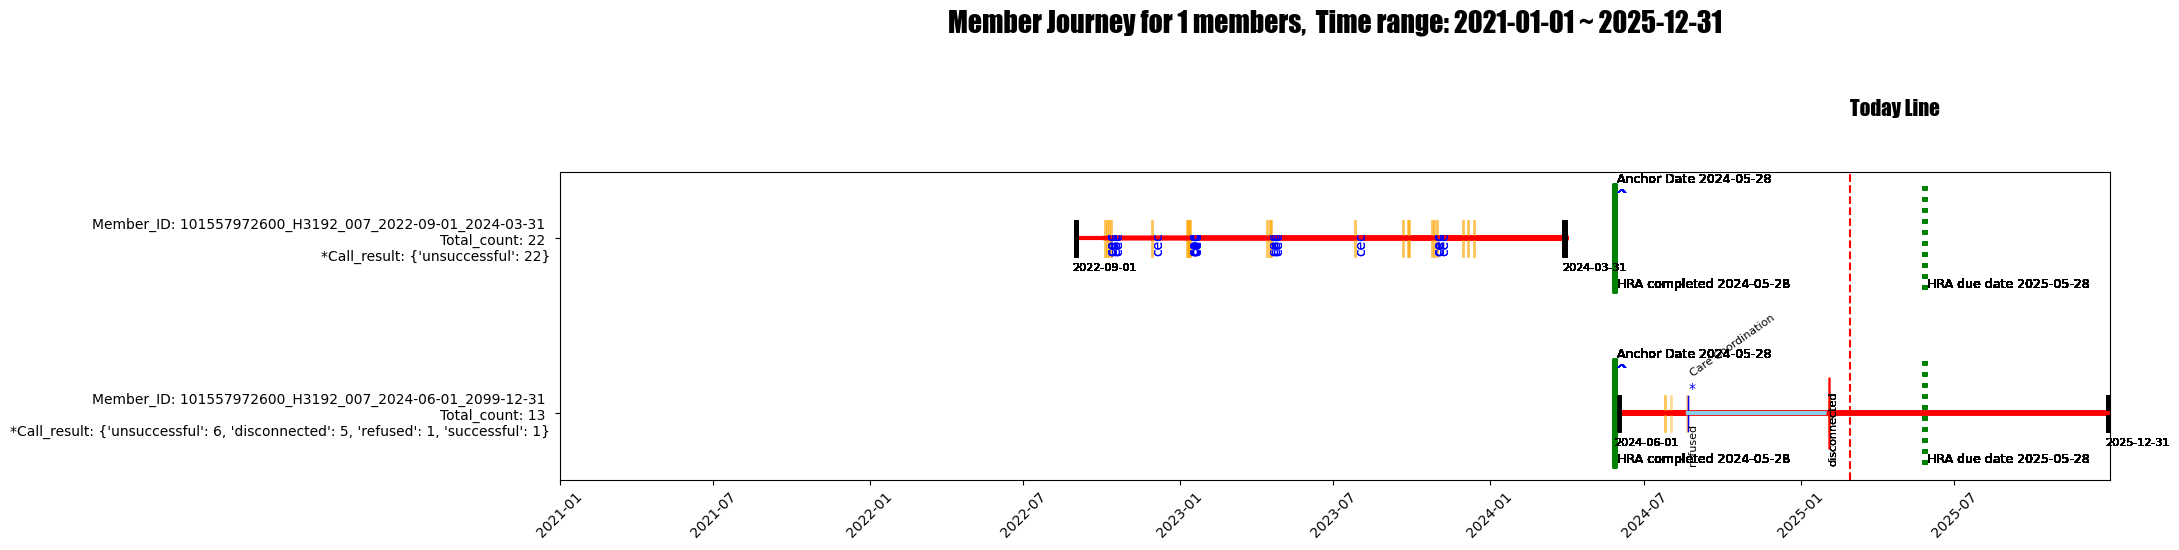

In [19]:
mj_input_df = mj.mj_prepare_input(call_with_member_info, hra_select_df, member_id_list=['101557972600'])
mj.member_call_journey(mj_input_df, limit_left ="2021-01-01", limit_right='2025-12-31')